### **Jorge Mario Trejos Barquero.**
### **B77676.**

#### **Tarea de segmentación o clustering**

Link del dataset: https://www.kaggle.com/harrywang/wine-dataset-for-clustering

#### **Problema y enfoque de la solución**

Para este caso tenemos un dataset de características de vinos, es un dataset pequeño debido a que solo tiene alrededor de 200 filas pero en compensación a su reducido tamaño se van a realizar 2 diferentes casos con el algoritmo de DBSCAN con 2 parámetros cada caso para poder graficar los clusters creados. Los casos a realizar son:

1. Porcentaje de alcohol y magnesio.
2. Magnesio e intensidad del color.

Esto con la finalidad de identificar clusters para estos pares de atributos, en otras palabras, para encontrar similitudes entre las relaciones que tienen.

#### **Iniciamos con el código**

Inicialmente se tendrá un apartado para poder incluir todas las librerías necesarias para poder llevar a cabo esta tarea.

In [1]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
import pandas as pd
from sklearn.metrics import silhouette_score

Importamos el dataset.

In [2]:
data = pd.read_csv('wine-clustering.csv', index_col=False)

data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### **Preprocesamiento y limpieza de datos**
Para este apartado el dataset está lo suficientemente limpio ya y tampoco necesita preprocesamiento, esto lo podemos ver si vemos los tipos de datos que tiene cada atributo, además, se sabe gracias a la página donde se descargó que el dataset no posee valores faltantes, de igual manera podemos realizar la comprobación de esto. 

In [3]:
# Vemos los tipos de datos
display(data.dtypes)

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [4]:
# Vemos si hay datos faltantes en los atributos que nos interesan
data.loc[data['Alcohol'].isnull()]
data.loc[data['Magnesium'].isnull()]
data.loc[data['Color_Intensity'].isnull()]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


La tabla sale vacía ya que no hay filas con null en esos atributos

#### **Técnicas de transformación de datos, selección y extracción de atributos**

Para esta parte ya se hacen cambios pensando en como se va a utilizar un algoritmo especifico para estudiar el dataset, como lo que se le va a aplicar a este dataset es DBSCAN en solo 3 atributos entonces extraemos los demas.

In [5]:
data = data.drop(['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Total_Phenols', 'Flavanoids', 
                  'Nonflavanoid_Phenols', 'Proanthocyanins', 'Hue', 'OD280', 'Proline'], axis = 1)
data.head()

,Alcohol,Magnesium,Color_Intensity
0,14.23,127,5.64
1,13.20,100,4.38
2,13.16,101,5.68
3,14.37,113,7.80
4,13.24,118,4.32


Ahora creamos los 3 subconjuntos a estudiar.

In [6]:
MyC = data.drop(['Alcohol'], axis = 1)

AyM = data.drop(['Color_Intensity'], axis = 1)

#### **Algoritmo de DBSCAN**
Ahora vamos a crear un método que realice el algoritmo de DBSCAN y grafique los resultados.

In [7]:
def dbscan (alcance, minimoDeMuestras, dataset):
    # define the model
    model = DBSCAN(eps=alcance, min_samples=minimoDeMuestras)
    
    # fit model and predict clusters
    yhat = model.fit_predict(dataset)
    
    # Silhuette
    score = silhouette_score(dataset, yhat)
    print("Silhouette score: " + str(score))
    
    # retrieve unique clusters
    clusters = unique(yhat)
    
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(dataset[row_ix, 0], dataset[row_ix, 1])
    
    # show the plot
    pyplot.show()

Para iniciar vamos a realizar el caso de alcohol y magnesio, para esto necesitamos defenir que "eps" y "min_samples" usar, de las clases se sabe que valores óptimos para "min_samples" en un factor mayor o igual a 2 multiplicado por la cantidad de columnas, entonces usaremos "min_samples" con 2 * 2, 3 * 2 y 4 * 2, para eps como alcohol va de 11 a 14.8 y magnesium de 70 a 162, tenemos que para alcohol existe un rango de 3.8 y para magnesium un rango de 92 y tenemos 178 muestras, entonces tenemos un area de unos 349,6, si la distribución fuera uniforme cada punto estaría a 1.96 de distancia de otro punto, es por esto que usaremos eps con valores de 1.25 hasta 2.0.

min_samples: 4 eps: 1.25
Silhouette score: 0.10525190398009307


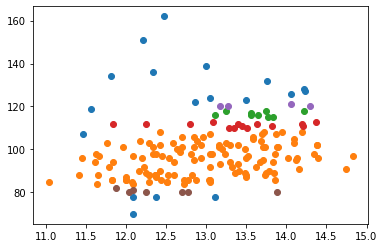

min_samples: 4 eps: 1.5
Silhouette score: 0.10469009627687162


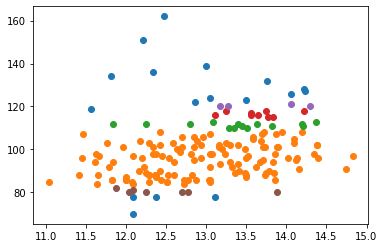

min_samples: 4 eps: 1.75
Silhouette score: 0.1121767554360571


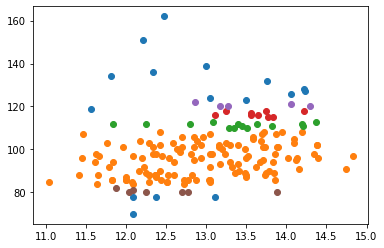

min_samples: 4 eps: 2.0
Silhouette score: 0.12771177978404002


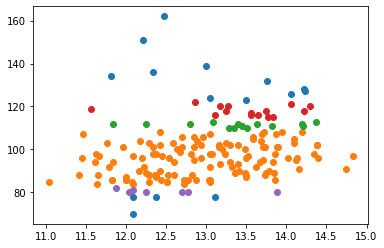

min_samples: 6 eps: 1.25
Silhouette score: 0.31865613753706135


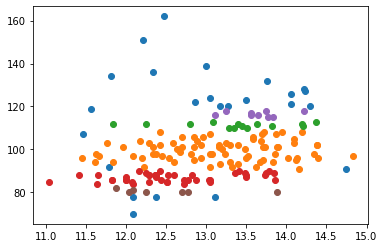

min_samples: 6 eps: 1.5
Silhouette score: 0.09590879769664289


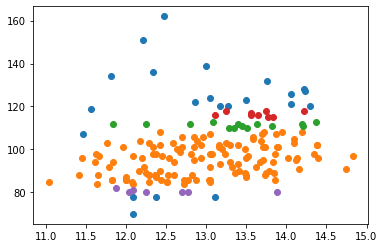

min_samples: 6 eps: 1.75
Silhouette score: 0.09538612378089871


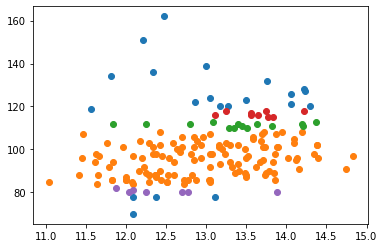

min_samples: 6 eps: 2.0
Silhouette score: 0.09538612378089871


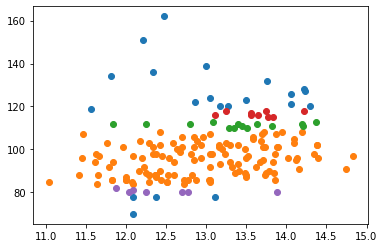

min_samples: 8 eps: 1.25
Silhouette score: 0.2684673409295789


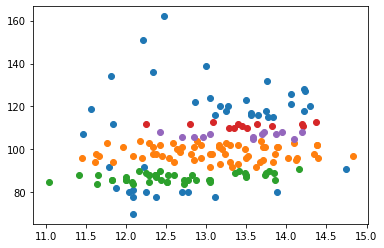

min_samples: 8 eps: 1.5
Silhouette score: 0.27861480192221527


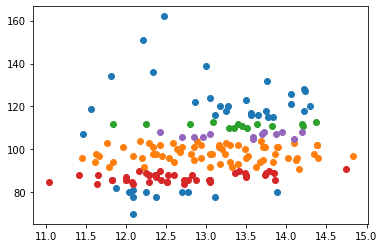

min_samples: 8 eps: 1.75
Silhouette score: 0.2703296231804931


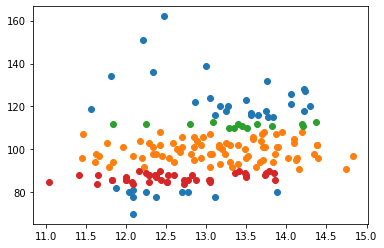

min_samples: 8 eps: 2.0
Silhouette score: 0.2703296231804931


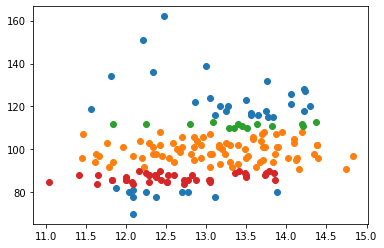

In [8]:
AyM = AyM.to_numpy()
minimoDeMuestras = [4, 6, 8]
rango = [1.25, 1.5, 1.75, 2.0]

for min_samples in minimoDeMuestras:
    for eps in rango:
        print ("min_samples: " + str(min_samples) + " eps: " + str(eps))
        dbscan(eps, min_samples, AyM)

Como podemos observar el que nos dio mejores resultados fue con "min_samples" = 6 y "eps" = 1.25 ya que nos dio un silhouette de 0.31, esto también se puede ver ya que es la gráfica que parece estar mejor agrupada.

Ahora bajo la misma lógica se hará el caso para Magnesium y Color Intensity.

min_samples: 4 eps: 2.5
Silhouette score: 0.43051544212167014


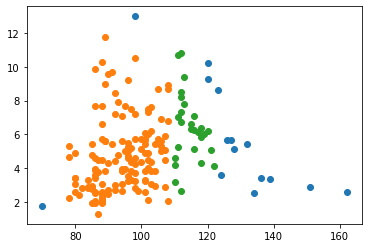

min_samples: 4 eps: 2.75
Silhouette score: 0.5485860963850225


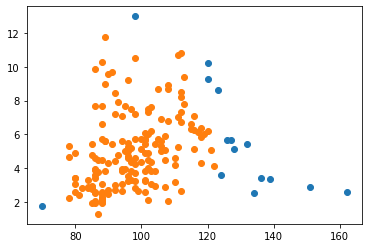

min_samples: 4 eps: 3.0
Silhouette score: 0.41620199006929676


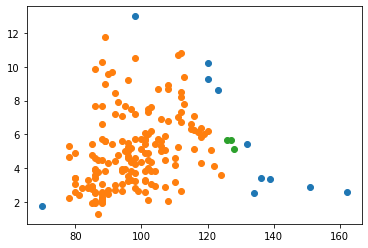

min_samples: 4 eps: 3.25
Silhouette score: 0.41902560220913604


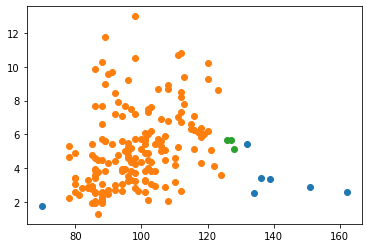

min_samples: 6 eps: 2.5
Silhouette score: 0.40313796358693543


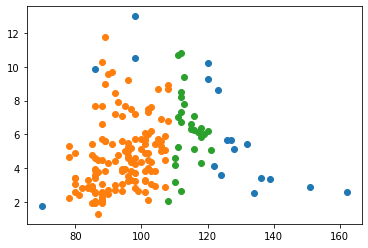

min_samples: 6 eps: 2.75
Silhouette score: 0.41218356329858813


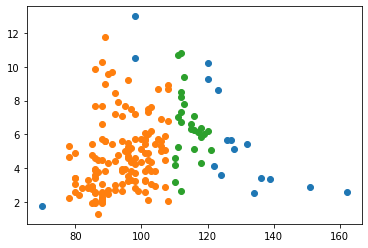

min_samples: 6 eps: 3.0
Silhouette score: 0.5485860963850225


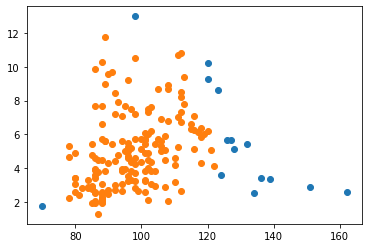

min_samples: 6 eps: 3.25
Silhouette score: 0.5539598715217785


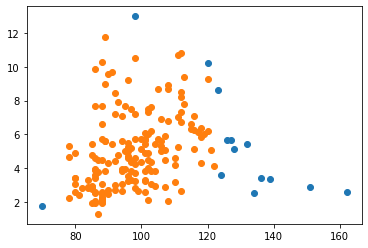

min_samples: 8 eps: 2.5
Silhouette score: 0.22009316411006707


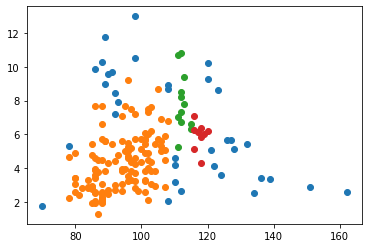

min_samples: 8 eps: 2.75
Silhouette score: 0.26619067363368065


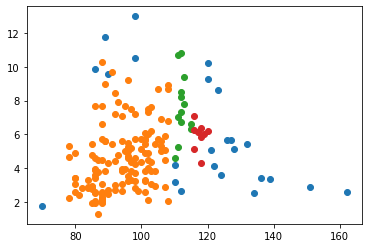

min_samples: 8 eps: 3.0
Silhouette score: 0.30048750810554353


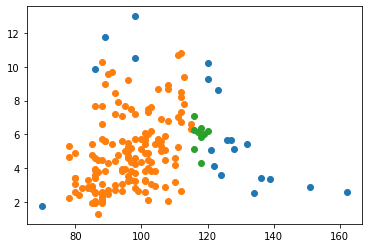

min_samples: 8 eps: 3.25
Silhouette score: 0.5539598715217785


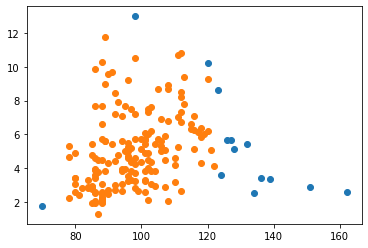

In [9]:
MyC = MyC.to_numpy()
minimoDeMuestras = [4, 6, 8]
rango = [2.5, 2.75, 3.0, 3.25]

for min_samples in minimoDeMuestras:
    for eps in rango:
        print ("min_samples: " + str(min_samples) + " eps: " + str(eps))
        dbscan(eps, min_samples, MyC)

Como se puede observar los mejores resultados fueron dados por "min_samples" = 6 y 8 con "eps" = 3.25 con un 0.55 de silhouette.

#### **Nota importante**
Para cambiar algo en este notebook y poder probarlo de manera correcta es mejor que se le de al botón de "restart the kernel and re-run the whole notebook" ya que parece que aveces queda sucio algún buffer interno a silhouette entonces da errores. 